<a href="https://colab.research.google.com/github/Indramawanciputra28/Komputasi-Kuantum/blob/main/Quantum_Sirkuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install qiskit==0.46.1 qiskit-aer pylatexenc

  Using cached qiskit-0.46.1-py3-none-any.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e0075dc2dc28305eec9477d0

In [4]:
# Impor librari
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, array_to_latex


#Membangun Sirkuit Kuantum

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


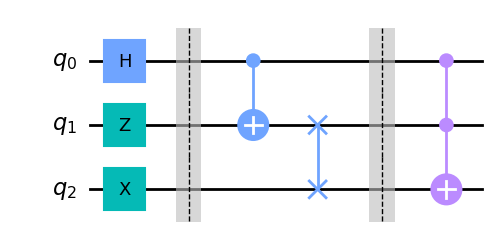

In [5]:
# Contoh sirkuit sederhana
qc = QuantumCircuit(3)  # Membuat sirkuit kuantum dengan 3 qubit

# Qubit tunggal
qc.h(0)  # Menerapkan gerbang Hadamard pada qubit ke-0 (q0)
qc.z(1)  # Menerapkan gerbang Z (Pauli-Z) pada qubit ke-1 (q1)
qc.x(2)  # Menerapkan gerbang X (Pauli-X / NOT) pada qubit ke-2 (q2)

qc.barrier()  # Menambahkan barrier untuk memisahkan bagian pertama sirkuit (tidak diproses secara logis)

# Qubit ganda
qc.cx(0, 1)  # Menerapkan gerbang CNOT (Controlled-NOT) antara qubit ke-0 (control) dan qubit ke-1 (target)
qc.swap(1, 2)  # Menukar keadaan antara qubit ke-1 dan qubit ke-2

qc.barrier()  # Menambahkan barrier untuk memisahkan bagian kedua sirkuit

# Qubit 3 atau lebih
qc.ccx(0, 1, 2)  # Menerapkan gerbang Toffoli (Controlled-Controlled-NOT) dengan qubit ke-0 dan ke-1 sebagai control, dan qubit ke-2 sebagai target

# Menggambar sirkuit
qc.draw('mpl')  # Menggambar sirkuit dalam format matplotlib


#Measurement Sirkuit

In [6]:
Ψ = Statevector(qc)  # Membuat state vector dari sirkuit kuantum (qc)
Ψ.draw('latex')  # Menampilkan state vector dalam format LaTeX


<IPython.core.display.Latex object>

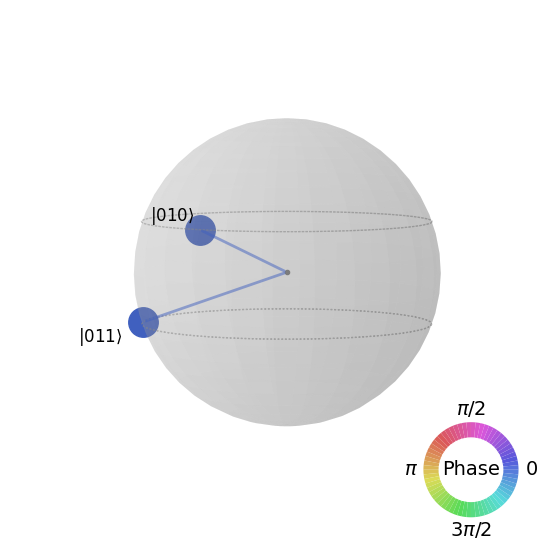

In [7]:
plot_state_qsphere(qc)

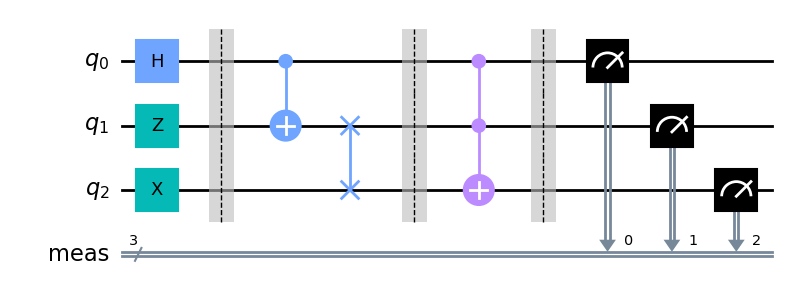

In [8]:
qc.measure_all()  # Menambahkan operasi pengukuran pada semua qubit di sirkuit

qc.draw(output='mpl', style='clifford')  # Menggambar sirkuit menggunakan format matplotlib dengan gaya Clifford


<ipython-input-9-4c4ceecfa2bc>:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend("qasm_simulator")
<ipython-input-9-4c4ceecfa2bc>:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  counts = execute(qc, backend, shots=1000).result().get_counts()


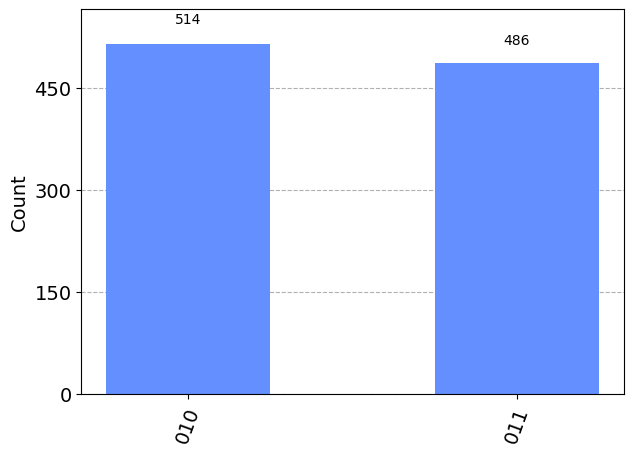

In [9]:
backend = Aer.get_backend("qasm_simulator")
# Mengatur backend untuk menjalankan sirkuit menggunakan simulator QASM (Quantum Assembly Language)

counts = execute(qc, backend, shots=1000).result().get_counts()
# Menjalankan sirkuit pada backend dengan 1000 iterasi (shots) dan mengambil hasil penghitungan

plot_histogram(counts)
# Menampilkan histogram hasil penghitungan dari pengukuran sirkuit


#Quantum Register dan Classical Register

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


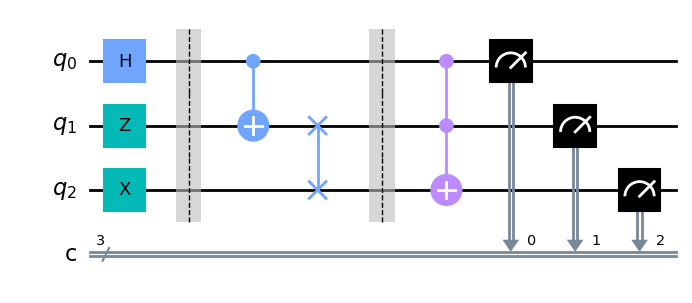

In [10]:
qr = QuantumRegister(3, 'q')  # Membuat quantum register dengan 3 qubit bernama 'q'
cr = ClassicalRegister(3, 'c')  # Membuat classical register dengan 3 bit bernama 'c'

qc = QuantumCircuit(qr, cr)  # Membuat quantum circuit yang menggabungkan quantum dan classical register

qc.h(0)  # Menerapkan gerbang Hadamard pada qubit ke-0
qc.z(1)  # Menerapkan gerbang Z pada qubit ke-1
qc.x(2)  # Menerapkan gerbang X pada qubit ke-2

qc.barrier()  # Menambahkan barrier untuk memisahkan bagian logis sirkuit

qc.cx(0, 1)  # Menerapkan gerbang CNOT dengan qubit ke-0 sebagai kontrol dan qubit ke-1 sebagai target
qc.swap(1, 2)  # Menukar keadaan antara qubit ke-1 dan qubit ke-2

qc.barrier()  # Menambahkan barrier untuk memisahkan bagian berikutnya dari sirkuit

qc.ccx(0, 1, 2)  # Menerapkan gerbang Toffoli (CCX) dengan qubit ke-0 dan ke-1 sebagai kontrol dan qubit ke-2 sebagai target

qc.measure([0, 1, 2], [0, 1, 2])
# Mengukur semua qubit (q0, q1, q2) dan menyimpan hasilnya ke classical register masing-masing (c0, c1, c2)

qc.draw('mpl')  # Menggambar sirkuit dalam format matplotlib


<ipython-input-11-3902e6b8e2e0>:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  counts = execute(qc, backend, shots=1000).result().get_counts()


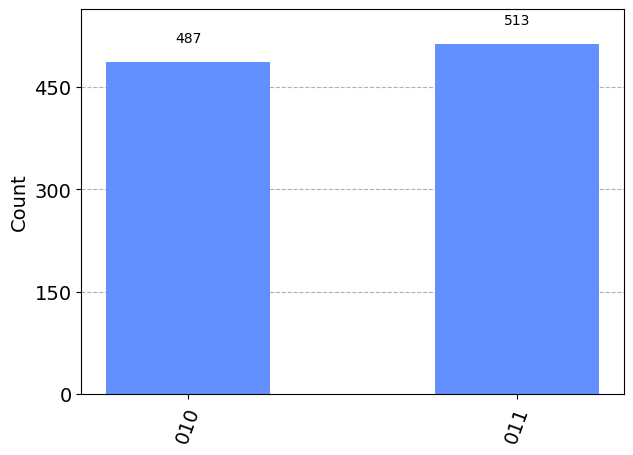

In [11]:
backend = Aer.get_backend('qasm_simulator')
# Mengatur backend untuk menjalankan simulasi sirkuit kuantum menggunakan QASM simulator

counts = execute(qc, backend, shots=1000).result().get_counts()
# Menjalankan sirkuit pada backend dengan 1000 iterasi (shots) dan mengambil hasil penghitungan berupa jumlah bitstring hasil pengukuran

plot_histogram(counts)
# Menampilkan histogram hasil penghitungan sebagai visualisasi distribusi hasil
